# Phase1: Model Building On Training Data

### Step1: Read Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train = pd.read_csv("Train.csv")

In [3]:
train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [4]:
train.shape

(543, 8)

In [5]:
train.columns

Index(['City', 'Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results',
       'IsUnderRisk'],
      dtype='object')

#Step2: Exploratory Data Analysis

Below are the steps involved to understand, clean and prepare your data for building your predictive model:

1.Variable Identification
2.Univariate Analysis
3.Bi-variate Analysis
4.Missing values treatment
5.Outlier treatment
6.Variable transformation
7.Variable creation

#2.1 Missing Data Analysis

In [6]:
train.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
IsUnderRisk             0
dtype: int64

#2.2 Data Type Analysis

In [7]:
train.dtypes

City                      int64
Location_Score          float64
Internal_Audit_Score      int64
External_Audit_Score      int64
Fin_Score                 int64
Loss_score                int64
Past_Results              int64
IsUnderRisk               int64
dtype: object

#2.3 Univariate Analysis
At this stage, we explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous. Let’s look at these methods and statistical measures for categorical and continuous variables individually:

Continuous Variables:- In case of continuous variables, we need to understand the central tendency and spread of the variable. These are measured using various statistical metrics such as Histogram and Bar plots:

In [8]:
train.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


2.3.1 Box Plot of CONTINUOUS variables

In [9]:
import matplotlib.pyplot as plot
train.columns

Index(['City', 'Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results',
       'IsUnderRisk'],
      dtype='object')

<AxesSubplot:>

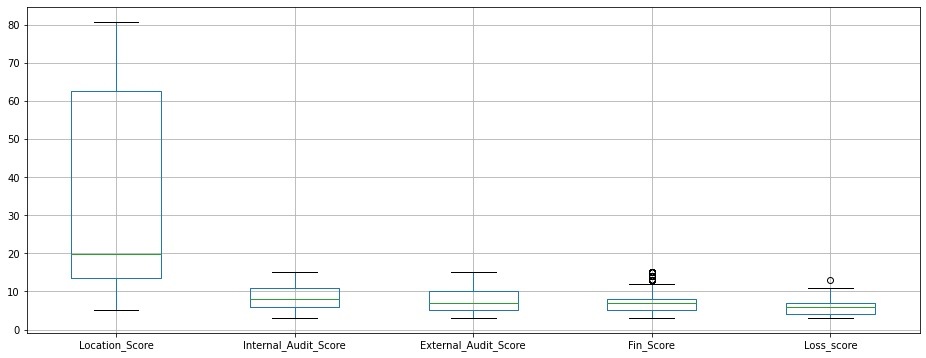

In [10]:
plt.figure(figsize=(16,6))
train.boxplot(column=['Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score'])


From the plots we can see that, there are lots of outliers in each varibale.

2.3.2 Plot for Continuous variables
2.3.3 Histogram Plots Of Continuous Variables

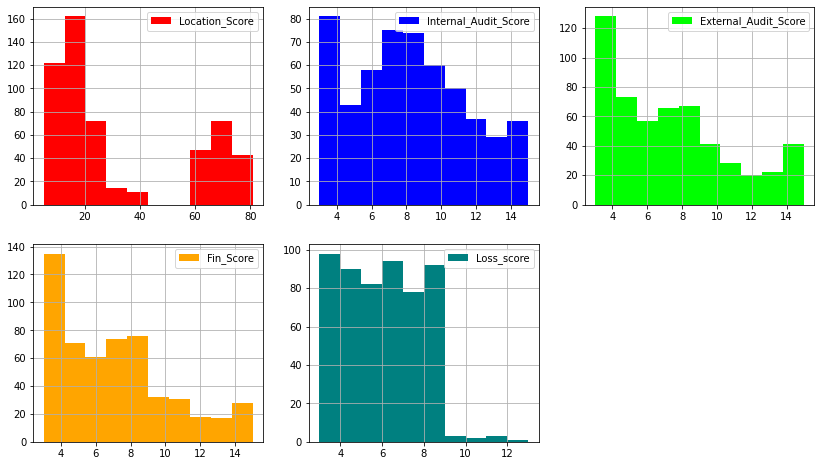

In [11]:
plt.figure(figsize=(14,8))
clr=['red','blue','lime','orange','teal']
columns = ['Location_Score', 'Internal_Audit_Score', 'External_Audit_Score', 'Fin_Score', 'Loss_score']
for i,j in zip(range(1,6),columns):
    plt.subplot(2,3,i)
    train[j].hist(color = clr[i-1], label=j)
    plt.legend()

2.3.4 Density Plots Of Continuous Variables

<Figure size 1008x576 with 0 Axes>

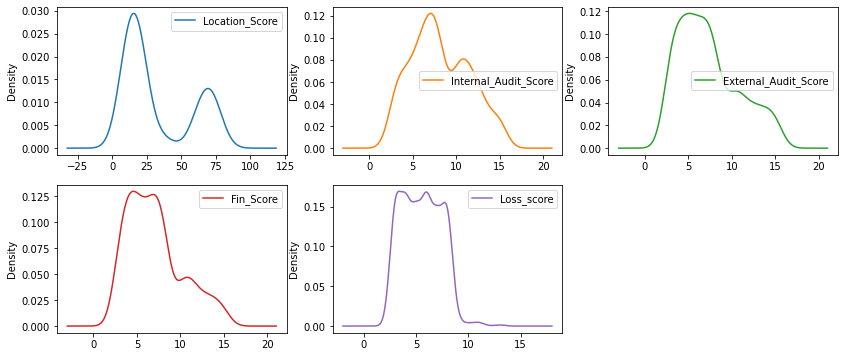

In [12]:
plt.figure(figsize=(14,8))
train[columns].plot(kind='density', subplots=True, 
                                                    layout=(2,3), sharex=False,
                                                    sharey=False, figsize=(14,6))
plt.show()

2.3.5 Discrete Variables Plot

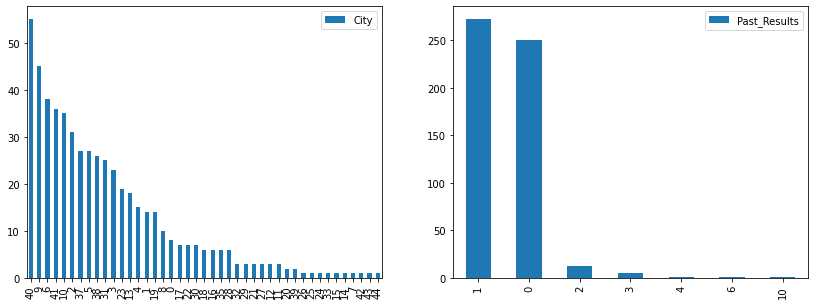

In [13]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
train.City.value_counts().plot(kind='bar', label = 'City')
plt.legend()

plt.subplot(1,2,2)
train.Past_Results.value_counts().plot(kind='bar', label = 'Past_Results')
plt.legend()

2.3.5 Target Variable Plot

<AxesSubplot:>

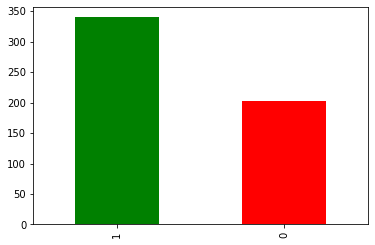

In [14]:
train.IsUnderRisk.value_counts().plot(kind='bar', color=['green', 'red'])

2.4 Bi-variate Analysis

Bi-variate Analysis finds out the relationship between two variables. Here, we look for association and disassociation between variables at a pre-defined significance level. We can perform bi-variate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous. Different methods are used to tackle these combinations during analysis process.

2.4.1 Correlation Matrix Plot

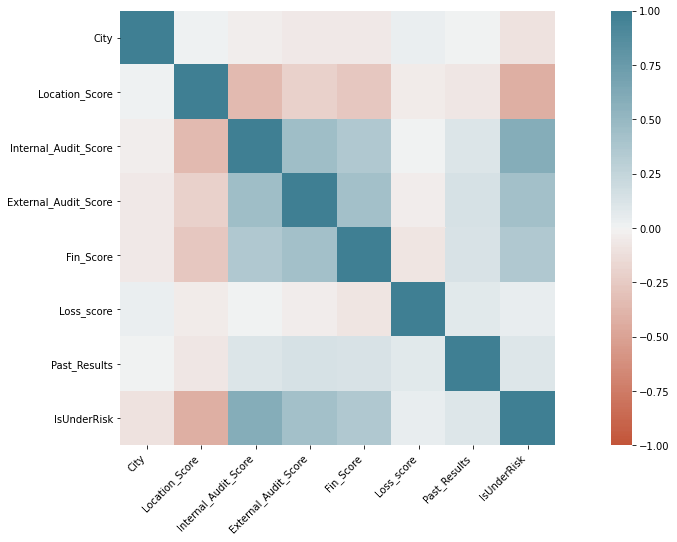

In [15]:
import seaborn as sns
plt.figure(figsize=(20,8))
corr = train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

2.4.2 Scatterplot Matrix

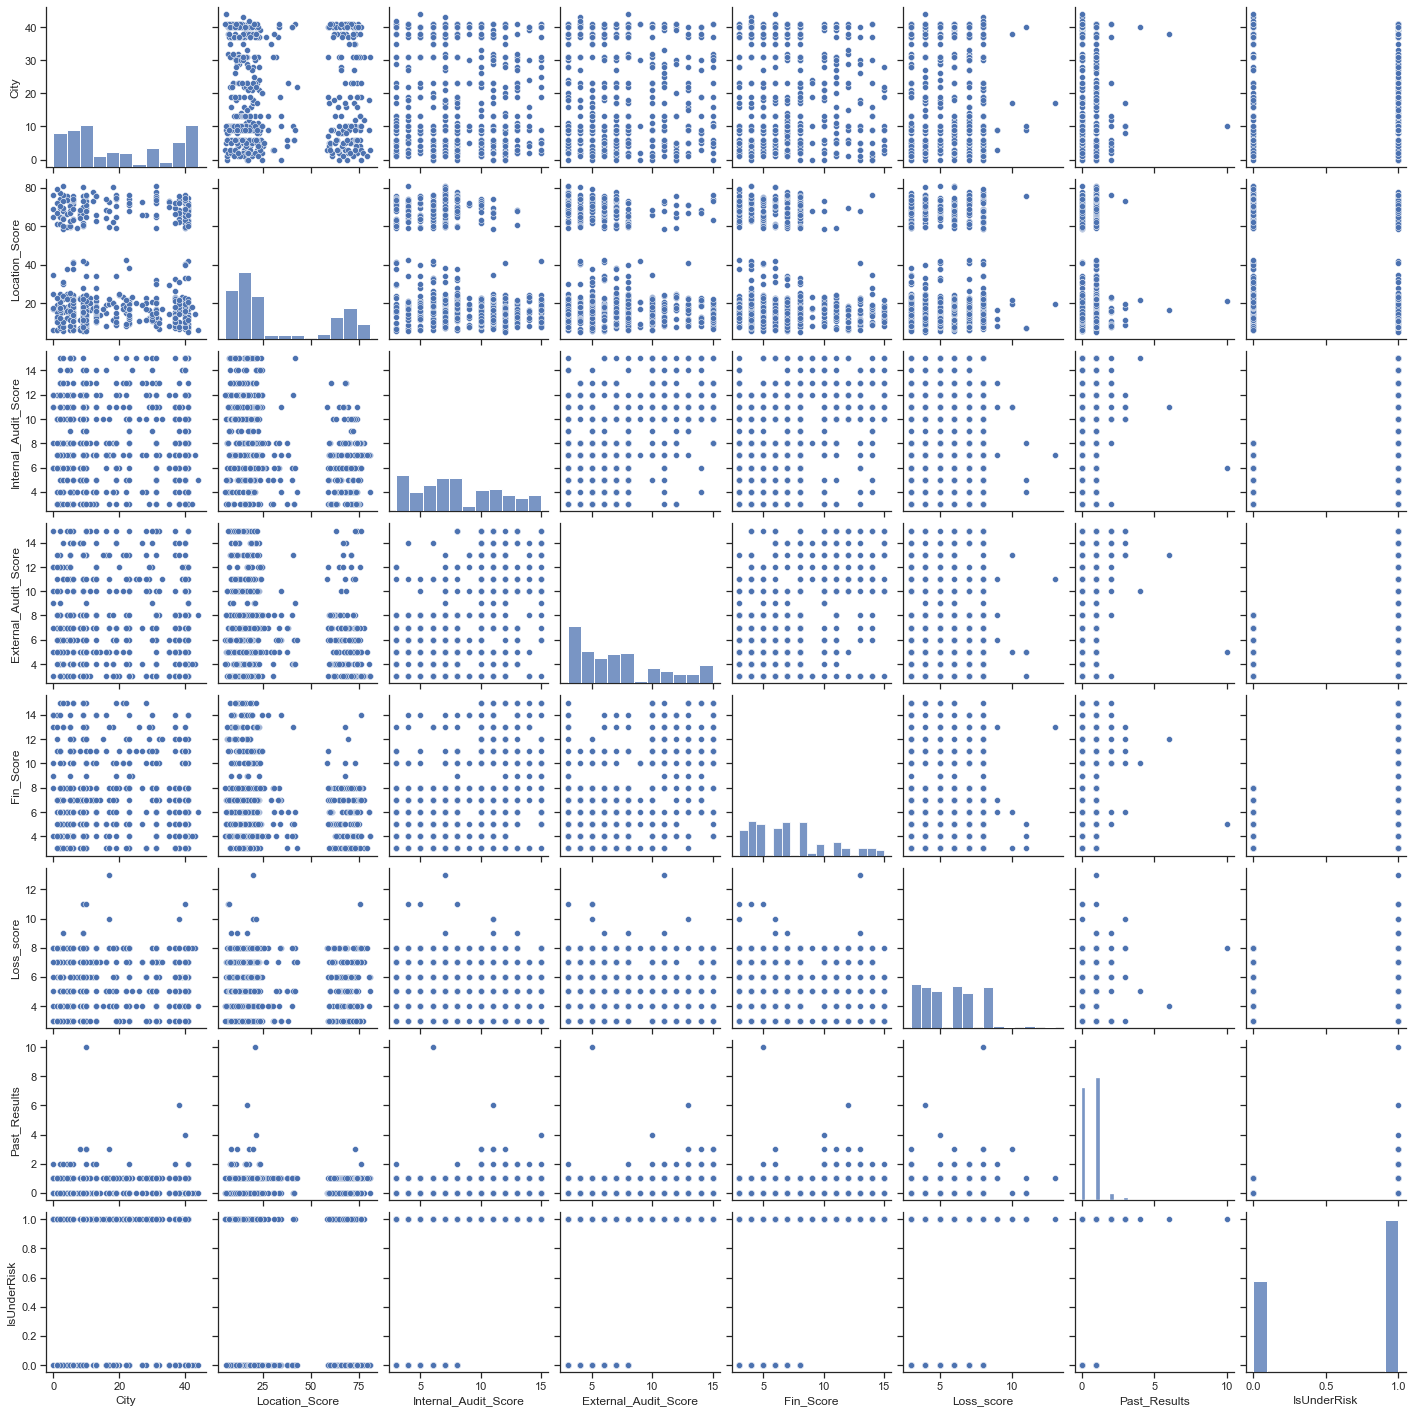

In [16]:
sns.set(style="ticks")

sns.pairplot(train)

Step4: Separating X and Y

4.1 Re-setting Index Before Splitting

In [17]:
train.reset_index(drop=True, inplace=True)

4.2 Split Data

In [18]:
x = train.drop(['IsUnderRisk'], axis=1)
y = train['IsUnderRisk']

In [19]:
x_copy = x.copy()

4.3 New Variables Creation

In [20]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x_copy[['City', 'Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results']])

In [21]:
x_poly.shape

(543, 36)

In [22]:
x_poly

array([[ 1.   ,  2.   ,  8.032, ..., 36.   ,  0.   ,  0.   ],
       [ 1.   , 31.   , 77.73 , ..., 64.   ,  8.   ,  1.   ],
       [ 1.   , 40.   , 59.203, ...,  9.   ,  0.   ,  0.   ],
       ...,
       [ 1.   ,  1.   , 79.243, ..., 64.   ,  8.   ,  1.   ],
       [ 1.   , 40.   , 69.14 , ..., 25.   ,  5.   ,  1.   ],
       [ 1.   , 13.   , 23.332, ...,  9.   ,  6.   ,  4.   ]])

Step5: Creating Train and Test Set In Ratio 80:20

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state =100)

Step6: Model Building

6.1 Identification Of Best Features

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(x, y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)


df_feat = pd.DataFrame(fit.ranking_, x.columns)
df_feat.rename(columns = {0:"Feature_Ranking"}, inplace=True)

Num Features: 3
Selected Features: [False False  True  True  True False False]
Feature Ranking: [5 4 1 1 1 3 2]


c:\users\hp-8470p\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


<AxesSubplot:>

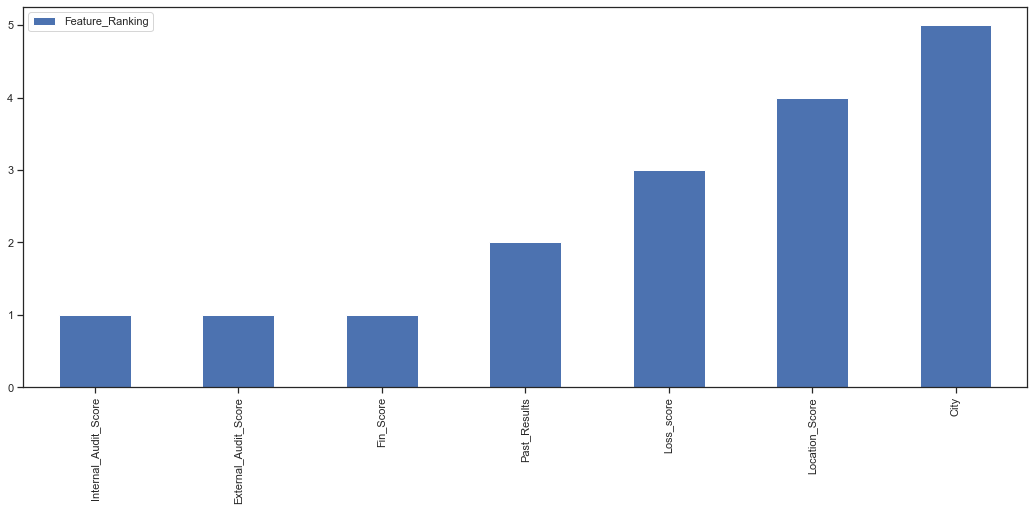

In [25]:
df_feat.sort_values(by="Feature_Ranking").plot(kind='bar', figsize=(18,7))

6.2 Importing and Model Fitting

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report

6.2.1 Decision Trees

In [27]:
from sklearn.tree import DecisionTreeClassifier

#making the instance
model= DecisionTreeClassifier(random_state=1234)

#Hyper Parameters Set
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}

# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)

# Fit on data
best_clf_dt = clf.fit(X_train, y_train)

#Predict
predictions = best_clf_dt.predict(X_test)

print("*******************ACCURACY***************************************************************")
#Check Prediction Score
print("Accuracy of Decision Trees: ",accuracy_score(y_test, predictions))

print("*******************CLASSIFICATION - REPORT***************************************************************")
print("Confusion matrix \n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

*******************ACCURACY***************************************************************
Accuracy of Decision Trees:  0.8165137614678899
*******************CLASSIFICATION - REPORT***************************************************************
Confusion matrix 
 [[37  8]
 [12 52]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79        45
           1       0.87      0.81      0.84        64

    accuracy                           0.82       109
   macro avg       0.81      0.82      0.81       109
weighted avg       0.82      0.82      0.82       109



6.2.2 Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

#making the instance
model= RandomForestClassifier(random_state=1234)

#Hyper Parameters Set
param_grid = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}

# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)

# Fit on data
best_clf_rf = clf.fit(X_train, y_train)

#Predict
predictions = best_clf_rf.predict(X_test)

#Check Prediction Score
print("Accuracy of Random Forest: ",accuracy_score(y_test, predictions))

#Print Classification Report
print("Confusion matrix \n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

Accuracy of Random Forest:  0.8623853211009175
Confusion matrix 
 [[39  6]
 [ 9 55]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        45
           1       0.90      0.86      0.88        64

    accuracy                           0.86       109
   macro avg       0.86      0.86      0.86       109
weighted avg       0.86      0.86      0.86       109



In [29]:
#RF On Full data

#making the instance
model= RandomForestClassifier(random_state=1234)

#Hyper Parameters Set
param_grid = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}

# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)

# Fit on data
best_clf_rf1 = clf.fit(x, y)
best_clf_rf2 = clf.fit(x_poly, y)

6.2.4 Adaboost

In [30]:
from sklearn.ensemble import AdaBoostClassifier

#making the instance
model= AdaBoostClassifier()

#Hyper Parameters Set
param_grid = {'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}

# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)

# Fit on data
best_clf_adab = clf.fit(X_train, y_train)

#Predict
predictions = best_clf_adab.predict(X_test)

#Check Prediction Score
print("Accuracy of Adaboost Classifier: ",accuracy_score(y_test, predictions))

#Print Classification Report
print("Confusion matrix \n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

Accuracy of Adaboost Classifier:  0.8990825688073395
Confusion matrix 
 [[40  5]
 [ 6 58]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        45
           1       0.92      0.91      0.91        64

    accuracy                           0.90       109
   macro avg       0.90      0.90      0.90       109
weighted avg       0.90      0.90      0.90       109



In [31]:
#making the instance
model= AdaBoostClassifier()

#Hyper Parameters Set
param_grid = {'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}

# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)

# Fit on data
best_clf_adab = clf.fit(x_poly, y)

Phase2: Applying Model On Test Data

In [32]:
test = pd.read_csv('Test.csv')

test.shape

(233, 7)

In [33]:
test.head(5)

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,41,18.272,13,12,9,7,0
1,17,64.799,6,10,7,4,1
2,31,68.890,3,3,7,8,0
3,3,16.492,15,10,7,4,1
4,9,17.178,7,3,8,3,1


In [34]:
test.columns

Index(['City', 'Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results'],
      dtype='object')

In [35]:
test_for_prediction = test[['City', 'Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results']]

In [36]:
pol_test_data = polynomial_features.fit_transform(test_for_prediction)

In [37]:
#Predict

prediction_from_dt  = best_clf_dt.predict_proba(test_for_prediction)
df_prediction_from_dt = pd.DataFrame(prediction_from_dt)
df_prediction_from_dt.to_excel("Final_output_prediction_from_dt.xlsx")

prediction_from_rf  = best_clf_rf.predict_proba(test_for_prediction)
df_prediction_from_rf = pd.DataFrame(prediction_from_rf)
df_prediction_from_rf.to_excel("Final_output_prediction_from_rf.xlsx")

In [38]:
prediction_from_rf1  = best_clf_rf1.predict_proba(test_for_prediction)
df_prediction_from_rf1 = pd.DataFrame(prediction_from_rf1)
df_prediction_from_rf1.to_excel("Final_output_prediction_from_rf1.xlsx")

ValueError: X has 7 features, but DecisionTreeClassifier is expecting 36 features as input.

In [ ]:
def predict_file(model, model_instance, test_data):
    prediction_var = "prediction_from" + model
    file_name = "Final_output_prediction_from_" + model + ".xlsx"
    prediction_var  = model_instance.predict_proba(test_data)
    df_prediction_var = pd.DataFrame(prediction_var)
    df_prediction_var.to_excel(file_name)
    print("{} created.".format(file_name))

In [ ]:
predict_file("adabclassifier", best_clf_adab, pol_test_data)

In [ ]:
predict_file("rf2_classifier", best_clf_rf2, pol_test_data)

In [ ]:
rf_op = pd.read_excel("Final_output_prediction_from_rf1.xlsx")

In [ ]:
rf_op = pd.read_excel("Final_output_prediction_from_rf.xlsx")

In [ ]:
rf_op.head()

In [ ]:
rf_op[0] = np.clip(rf_op[0],0.005, 0.995)
rf_op[1] = np.clip(rf_op[1],0.005, 0.995)

In [ ]:
rf_op.to_excel("Final_output_prediction_from_rf1_classifier_new.xlsx")